In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import datetime
import operator
%matplotlib inline

In [2]:
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
death_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [3]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/25/21,8/26/21,8/27/21,8/28/21,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,152722,152822,152960,152960,152960,153148,153220,153260,153306,153375
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,141365,142253,143174,144079,144847,145333,146387,147369,148222,149117
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,193171,193674,194186,194671,195162,195574,196080,196527,196915,197308
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,15014,15016,15025,15025,15025,15032,15033,15046,15052,15055
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,46539,46726,46929,47079,47168,47331,47544,47781,48004,48261


In [4]:
death_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/25/21,8/26/21,8/27/21,8/28/21,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7090,7093,7101,7101,7101,7116,7118,7123,7127,7127
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2483,2486,2487,2490,2492,2495,2498,2501,2505,2508
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,5096,5121,5148,5179,5209,5240,5269,5302,5339,5373
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1176,1182,1186,1192,1201,1210,1217,1227,1235,1248


In [5]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/25/21,8/26/21,8/27/21,8/28/21,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '8/25/21', '8/26/21', '8/27/21', '8/28/21', '8/29/21', '8/30/21',
       '8/31/21', '9/1/21', '9/2/21', '9/3/21'],
      dtype='object', length=595)

In [7]:
confirmed_filtered = confirmed_cases.loc[:, cols[4]:cols[-1]]
confirmed_filtered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/25/21,8/26/21,8/27/21,8/28/21,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21
0,0,0,0,0,0,0,0,0,0,0,...,152722,152822,152960,152960,152960,153148,153220,153260,153306,153375
1,0,0,0,0,0,0,0,0,0,0,...,141365,142253,143174,144079,144847,145333,146387,147369,148222,149117
2,0,0,0,0,0,0,0,0,0,0,...,193171,193674,194186,194671,195162,195574,196080,196527,196915,197308
3,0,0,0,0,0,0,0,0,0,0,...,15014,15016,15025,15025,15025,15032,15033,15046,15052,15055
4,0,0,0,0,0,0,0,0,0,0,...,46539,46726,46929,47079,47168,47331,47544,47781,48004,48261


In [8]:
singapore_confirmed_filtered = confirmed_cases[confirmed_cases["Country/Region"] == "Singapore"].loc[:, cols[4]:cols[-1]]
singapore_confirmed_filtered

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/25/21,8/26/21,8/27/21,8/28/21,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21
230,0,1,3,3,4,5,7,7,10,13,...,66812,66928,66928,67171,67171,67459,67620,67800,67991,68210


In [9]:
deaths_filtered = death_cases.loc[:, cols[4]:cols[-1]]
deaths_filtered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/25/21,8/26/21,8/27/21,8/28/21,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21
0,0,0,0,0,0,0,0,0,0,0,...,7090,7093,7101,7101,7101,7116,7118,7123,7127,7127
1,0,0,0,0,0,0,0,0,0,0,...,2483,2486,2487,2490,2492,2495,2498,2501,2505,2508
2,0,0,0,0,0,0,0,0,0,0,...,5096,5121,5148,5179,5209,5240,5269,5302,5339,5373
3,0,0,0,0,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130
4,0,0,0,0,0,0,0,0,0,0,...,1176,1182,1186,1192,1201,1210,1217,1227,1235,1248


In [10]:
recovered_filtered = recovered_cases.loc[:, cols[4]:cols[-1]]
recovered_filtered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/25/21,8/26/21,8/27/21,8/28/21,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Finding the total confirmed cases, death cases and the recovered cases and append them to an 4 empty lists
# Also, calculate the total mortality rate which is the death_sum/confirmed cases

dates = confirmed_filtered.keys()
world_cases = []
singapore_cases = []
total_deaths = [] 
mortality_rate = []
total_recovered = [] 

for i in dates:
    confirmed_sum = confirmed_filtered[i].sum()
    singapore_confirmed_sum = singapore_confirmed_filtered[i].sum()
    death_sum = deaths_filtered[i].sum()
    recovered_sum = recovered_filtered[i].sum()
    world_cases.append(confirmed_sum)
    singapore_cases.append(singapore_confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [12]:
confirmed_sum, death_sum, recovered_sum, world_cases, singapore_cases

(219778828,
 4553371,
 0,
 [557,
  655,
  941,
  1433,
  2118,
  2927,
  5578,
  6167,
  8235,
  9927,
  12038,
  16787,
  19887,
  23898,
  27643,
  30803,
  34396,
  37130,
  40160,
  42769,
  44811,
  45229,
  60382,
  66909,
  69052,
  71235,
  73270,
  75152,
  75652,
  76212,
  76841,
  78602,
  78982,
  79546,
  80400,
  81377,
  82736,
  84122,
  86014,
  88396,
  90375,
  92977,
  95281,
  98094,
  102015,
  106109,
  110048,
  114231,
  119052,
  126719,
  132507,
  146880,
  157983,
  169243,
  184034,
  200025,
  219605,
  246703,
  277580,
  309733,
  344784,
  387549,
  428614,
  479649,
  542615,
  607703,
  674931,
  734395,
  799670,
  876514,
  959593,
  1042604,
  1126371,
  1185525,
  1256920,
  1330324,
  1400195,
  1483570,
  1570452,
  1655865,
  1730162,
  1850115,
  1921102,
  2005378,
  2082987,
  2178439,
  2266574,
  2343710,
  2420687,
  2496244,
  2571994,
  2653342,
  2737666,
  2821824,
  2904203,
  2975522,
  3045791,
  3121448,
  3198641,
  3282173,
  

In [13]:
# Convert all the dates and the cases in the form of a numpy array

days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
singapore_cases = np.array(singapore_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

days_since_1_22

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [14]:
world_cases

array([[      557],
       [      655],
       [      941],
       [     1433],
       [     2118],
       [     2927],
       [     5578],
       [     6167],
       [     8235],
       [     9927],
       [    12038],
       [    16787],
       [    19887],
       [    23898],
       [    27643],
       [    30803],
       [    34396],
       [    37130],
       [    40160],
       [    42769],
       [    44811],
       [    45229],
       [    60382],
       [    66909],
       [    69052],
       [    71235],
       [    73270],
       [    75152],
       [    75652],
       [    76212],
       [    76841],
       [    78602],
       [    78982],
       [    79546],
       [    80400],
       [    81377],
       [    82736],
       [    84122],
       [    86014],
       [    88396],
       [    90375],
       [    92977],
       [    95281],
       [    98094],
       [   102015],
       [   106109],
       [   110048],
       [   114231],
       [   119052],
       [   126719],


In [15]:
singapore_cases

array([[    0],
       [    1],
       [    3],
       [    3],
       [    4],
       [    5],
       [    7],
       [    7],
       [   10],
       [   13],
       [   16],
       [   18],
       [   18],
       [   24],
       [   28],
       [   28],
       [   30],
       [   33],
       [   40],
       [   45],
       [   47],
       [   50],
       [   58],
       [   67],
       [   72],
       [   75],
       [   77],
       [   81],
       [   84],
       [   84],
       [   85],
       [   85],
       [   89],
       [   89],
       [   91],
       [   93],
       [   93],
       [   93],
       [  102],
       [  106],
       [  108],
       [  110],
       [  110],
       [  117],
       [  130],
       [  138],
       [  150],
       [  150],
       [  160],
       [  178],
       [  178],
       [  200],
       [  212],
       [  226],
       [  243],
       [  266],
       [  313],
       [  345],
       [  385],
       [  432],
       [  455],
       [  509],
       [

In [16]:
# Future forecasting for the next 10 days

days_in_future = 10
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-10]

future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [17]:
# Convert all the integers into datetime for better visualization

start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [18]:
# visualisation with the latest data

latest_confirmed = confirmed_filtered[dates[-1]]
latest_deaths = deaths_filtered[dates[-1]]
latest_recoveries = recovered_filtered[dates[-1]]

latest_confirmed, latest_deaths, latest_recoveries

(0      153375
 1      149117
 2      197308
 3       15055
 4       48261
         ...  
 274    501649
 275    350224
 276      8018
 277    206884
 278    125331
 Name: 9/3/21, Length: 279, dtype: int64,
 0       7127
 1       2508
 2       5373
 3        130
 4       1248
        ...  
 274    12446
 275     3706
 276     1513
 277     3611
 278     4457
 Name: 9/3/21, Length: 279, dtype: int64,
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 259    0
 260    0
 261    0
 262    0
 263    0
 Name: 9/3/21, Length: 264, dtype: int64)

In [19]:
# create a list of unique countries

unique_countries = list(confirmed_cases['Country/Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [20]:
# The next line of code will basically calculate the total number of confirmed cases by each country

country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()

In [21]:
# number of cases per country/region

print('Confirmed Cases by Countries/Regions:')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Confirmed Cases by Countries/Regions:
US: 39850256 cases
India: 32903289 cases
Brazil: 20856060 cases
United Kingdom: 6937270 cases
France: 6897529 cases
Russia: 6875713 cases
Turkey: 6412247 cases
Argentina: 5199919 cases
Iran: 5083133 cases
Colombia: 4914881 cases
Spain: 4877755 cases
Italy: 4559970 cases
Indonesia: 4116890 cases
Germany: 3996688 cases
Mexico: 3405294 cases
Poland: 2889773 cases
South Africa: 2805604 cases
Ukraine: 2393002 cases
Peru: 2153092 cases
Philippines: 2040568 cases
Netherlands: 1984977 cases
Iraq: 1908079 cases
Malaysia: 1805382 cases
Czechia: 1680046 cases
Chile: 1640192 cases
Japan: 1546477 cases
Canada: 1519248 cases
Bangladesh: 1510283 cases
Thailand: 1249140 cases
Belgium: 1192008 cases
Pakistan: 1171578 cases
Sweden: 1130525 cases
Israel: 1104971 cases
Romania: 1103198 cases
Portugal: 1042322 cases
Kazakhstan: 879358 cases
Morocco: 876732 cases
Hungary: 813040 cases
Jordan: 799825 cases
Switzerland: 785696 cases
Serbia: 773426 cases
Nepal: 767271 case

In [22]:
# Find the list of unique provinces

# remove NaN
# unique_provinces =  list(confirmed_cases['Province/State'].unique())[1:]
unique_provinces =  list(confirmed_cases['Province/State'].unique())
unique_provinces

[nan,
 'Australian Capital Territory',
 'New South Wales',
 'Northern Territory',
 'Queensland',
 'South Australia',
 'Tasmania',
 'Victoria',
 'Western Australia',
 'Alberta',
 'British Columbia',
 'Diamond Princess',
 'Grand Princess',
 'Manitoba',
 'New Brunswick',
 'Newfoundland and Labrador',
 'Northwest Territories',
 'Nova Scotia',
 'Nunavut',
 'Ontario',
 'Prince Edward Island',
 'Quebec',
 'Repatriated Travellers',
 'Saskatchewan',
 'Yukon',
 'Anhui',
 'Beijing',
 'Chongqing',
 'Fujian',
 'Gansu',
 'Guangdong',
 'Guangxi',
 'Guizhou',
 'Hainan',
 'Hebei',
 'Heilongjiang',
 'Henan',
 'Hong Kong',
 'Hubei',
 'Hunan',
 'Inner Mongolia',
 'Jiangsu',
 'Jiangxi',
 'Jilin',
 'Liaoning',
 'Macau',
 'Ningxia',
 'Qinghai',
 'Shaanxi',
 'Shandong',
 'Shanghai',
 'Shanxi',
 'Sichuan',
 'Tianjin',
 'Tibet',
 'Unknown',
 'Xinjiang',
 'Yunnan',
 'Zhejiang',
 'Faroe Islands',
 'Greenland',
 'French Guiana',
 'French Polynesia',
 'Guadeloupe',
 'Martinique',
 'Mayotte',
 'New Caledonia',
 'Reu

In [23]:
# Finding the number of confirmed cases per province, state or city

province_confirmed_cases = []
no_cases = [] 
for i in unique_provinces:
    cases = latest_confirmed[confirmed_cases['Province/State']==i].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
for case in no_cases:
    unique_provinces.remove(case)

In [24]:
# number of cases per province/state/city

for i in range(len(unique_provinces)):
    print(f'{unique_provinces[i]}: {province_confirmed_cases[i]} cases')

Australian Capital Territory: 483 cases
New South Wales: 32323 cases
Northern Territory: 202 cases
Queensland: 1984 cases
South Australia: 877 cases
Tasmania: 235 cases
Victoria: 22759 cases
Western Australia: 1086 cases
Alberta: 256985 cases
British Columbia: 168325 cases
Grand Princess: 13 cases
Manitoba: 58845 cases
New Brunswick: 2798 cases
Newfoundland and Labrador: 1491 cases
Northwest Territories: 499 cases
Nova Scotia: 6047 cases
Nunavut: 658 cases
Ontario: 575888 cases
Prince Edward Island: 233 cases
Quebec: 391363 cases
Repatriated Travellers: 13 cases
Saskatchewan: 55396 cases
Yukon: 694 cases
Anhui: 1008 cases
Beijing: 1117 cases
Chongqing: 603 cases
Fujian: 792 cases
Gansu: 199 cases
Guangdong: 3083 cases
Guangxi: 290 cases
Guizhou: 147 cases
Hainan: 190 cases
Hebei: 1317 cases
Heilongjiang: 1616 cases
Henan: 1531 cases
Hong Kong: 12112 cases
Hubei: 68291 cases
Hunan: 1181 cases
Inner Mongolia: 412 cases
Jiangsu: 1591 cases
Jiangxi: 937 cases
Jilin: 574 cases
Liaoning: 446

In [25]:
# handling nan values if there is any

nan_indices = [] 

for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

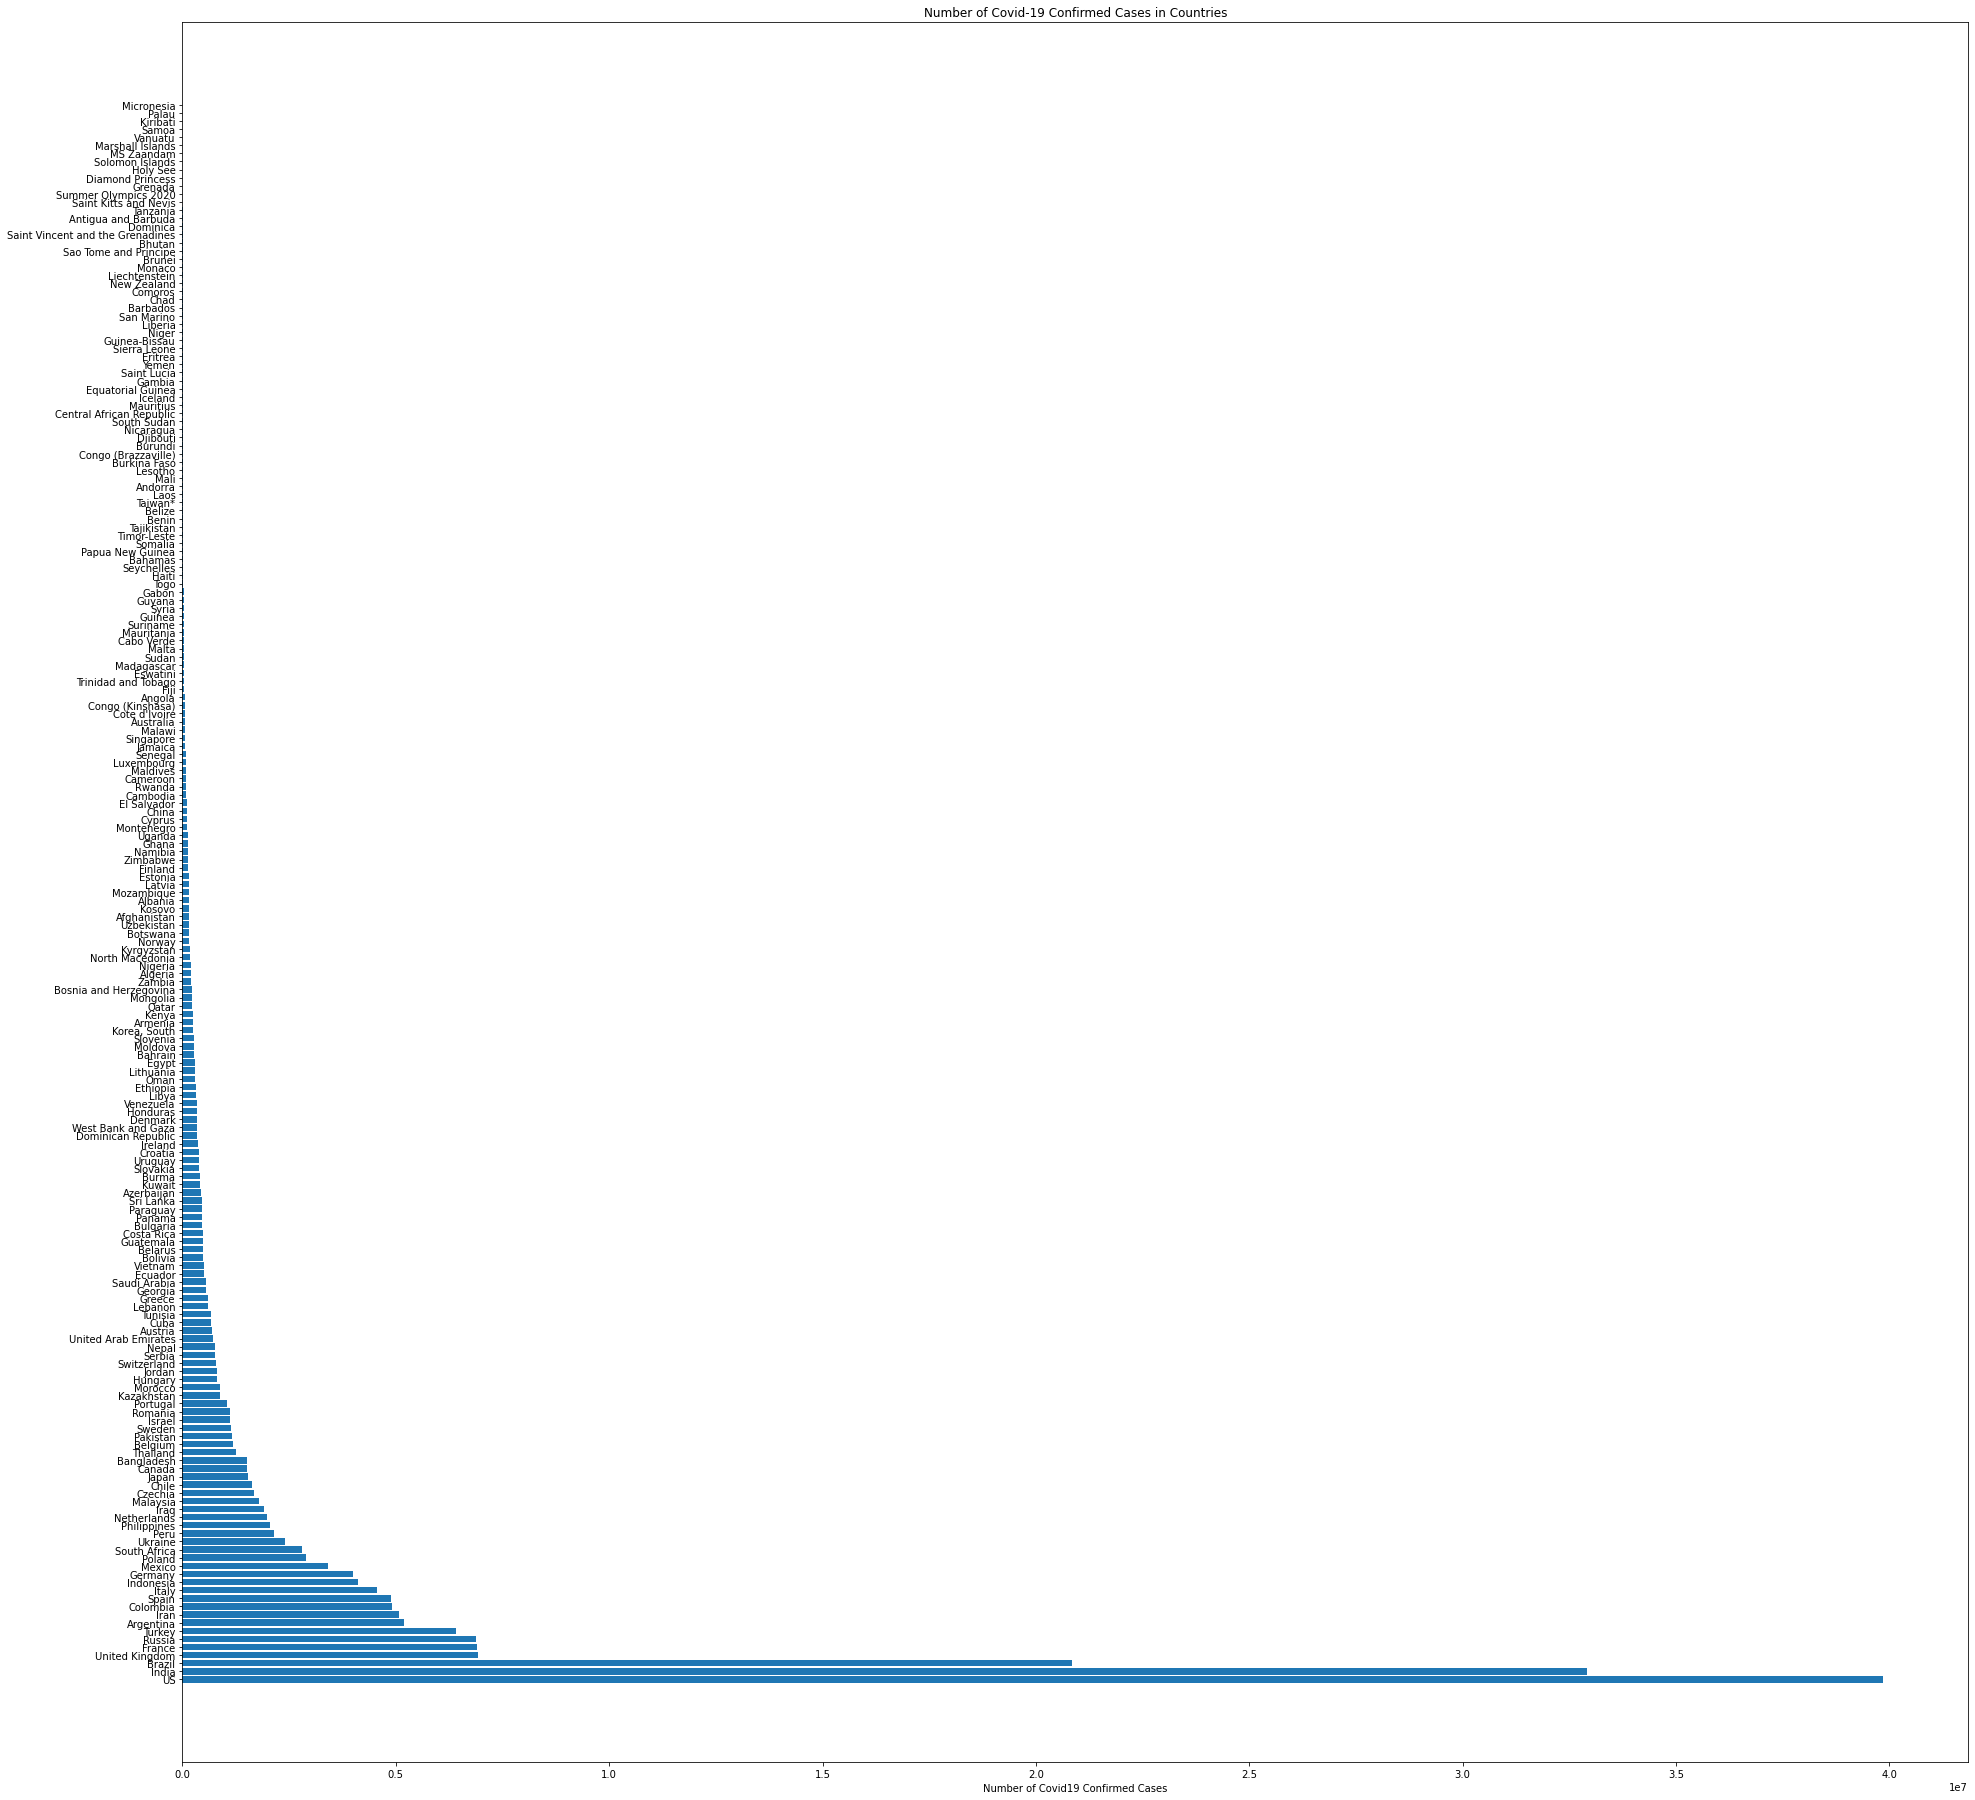

In [26]:
# Plot a bar graph to see the total confirmed cases across different countries

plt.figure(figsize=(32, 32))
plt.barh(unique_countries, country_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in Countries')
plt.xlabel('Number of Covid19 Confirmed Cases')
plt.show()

In [27]:
# Only show 10 countries with the most confirmed cases, the rest are grouped into the category named others

visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])
for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])

visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

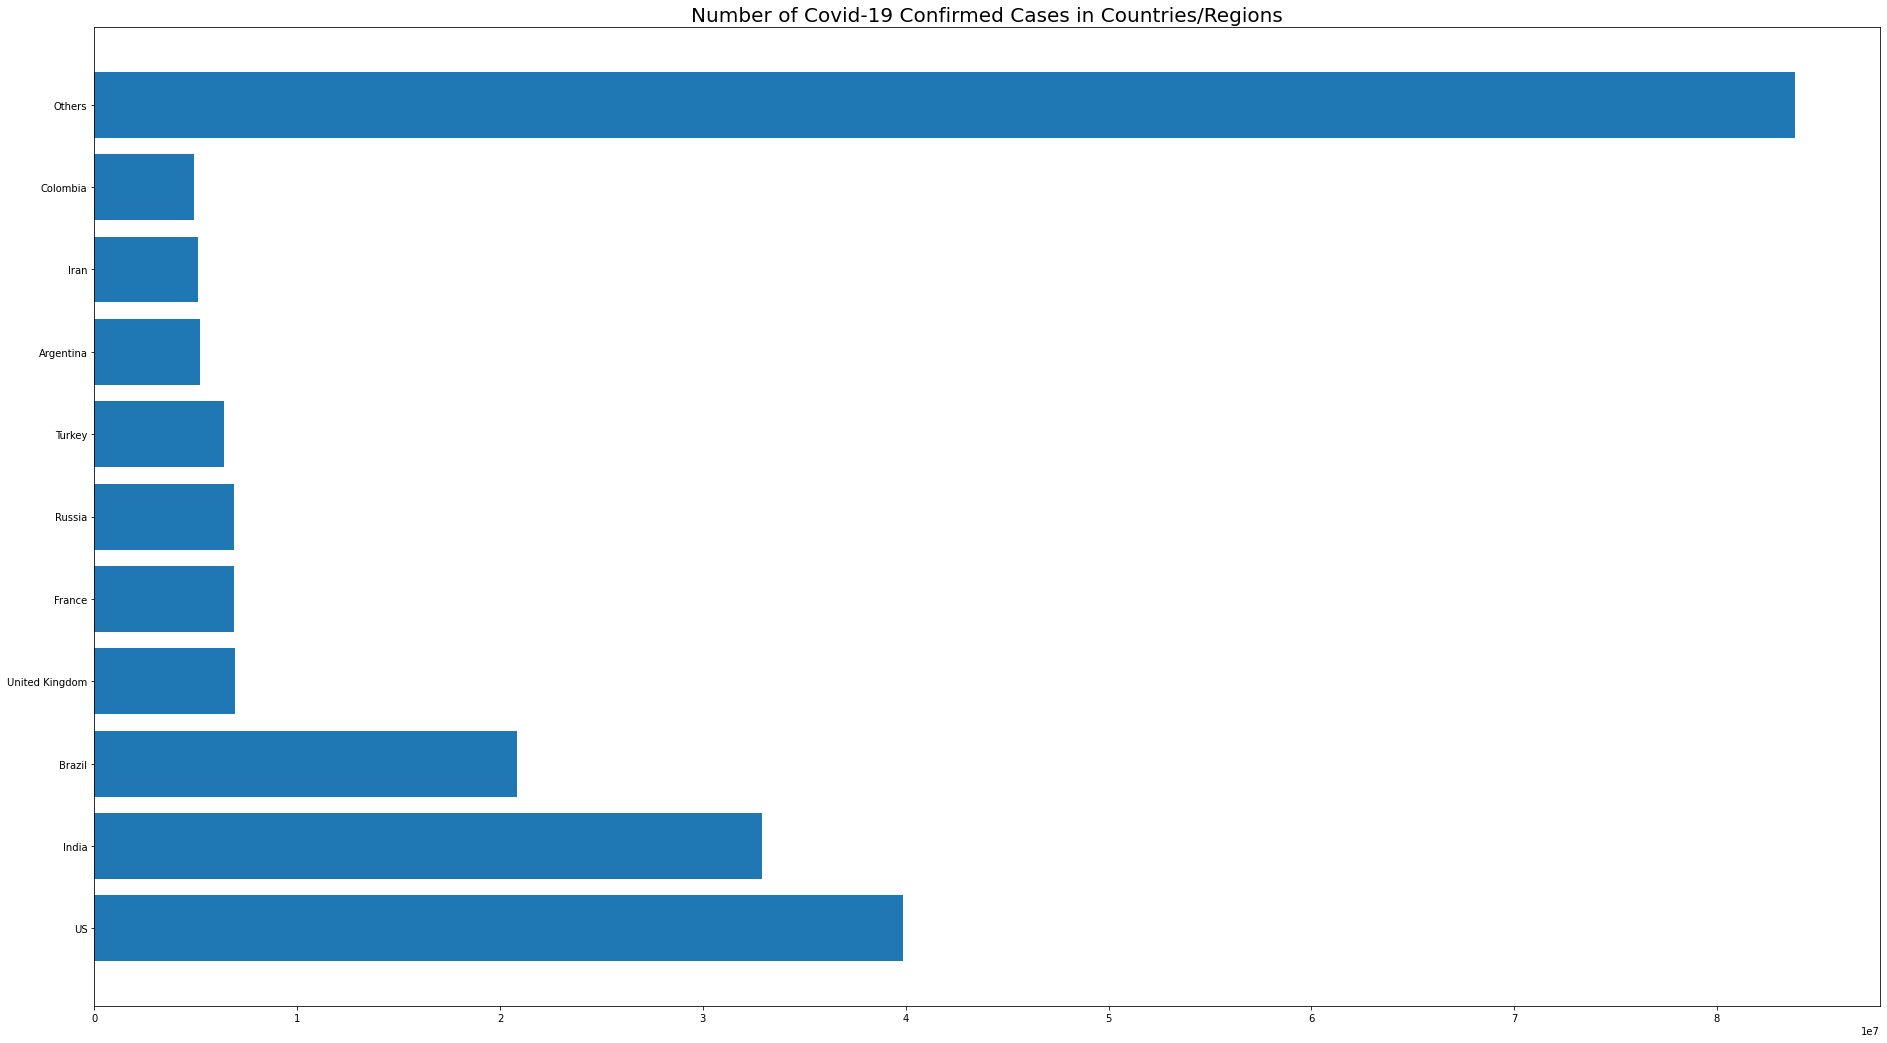

In [28]:
# Visualize the 10 countries

plt.figure(figsize=(32, 18))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in Countries/Regions', size=20)
plt.show()

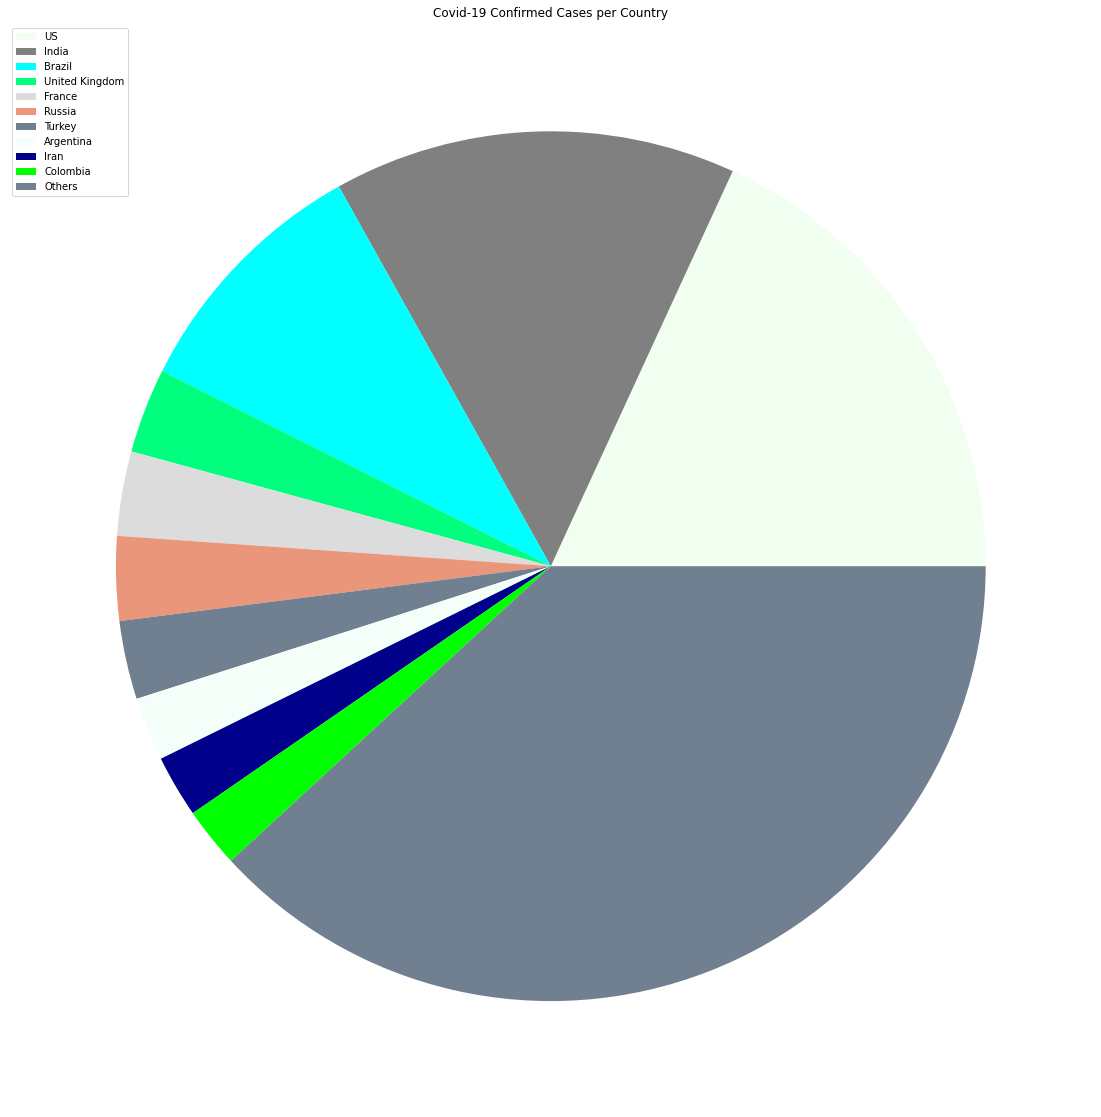

In [29]:
# Create a pie chart to see the total confirmed cases in 10 different countries

c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-19 Confirmed Cases per Country')
plt.pie(visual_confirmed_cases, colors=c)
plt.legend(visual_unique_countries, loc='best')
plt.show()

**Global Predictions**

In [30]:
# split data into train/test for global

days_to_skip = 529
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[days_to_skip:], world_cases[days_to_skip:], test_size=0.20, shuffle=False)

In [31]:
# Building the SVM model

# c = [0.01, 0.1, 1]
# gamma = [0.01, 0.1, 1]
# epsilon = [0.01, 0.1, 1]
# shrinking = [True, False]

# svm_grid = {'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

# svm = SVR(kernel='poly', degree=3)
# svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
# svm_search.fit(X_train_confirmed, y_train_confirmed)

In [32]:
# svm_search.best_params_

In [33]:
svm_confirmed = SVR(shrinking=True, kernel='poly', gamma=0.01, epsilon=1, degree=3, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed.ravel())
svm_pred = svm_confirmed.predict(future_forecast)

MAE: 346772.6990910448
MSE: 131117815622.42526


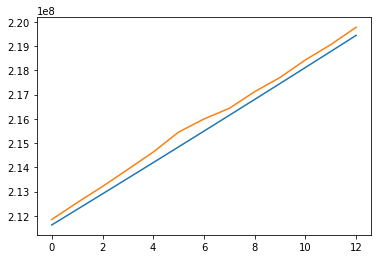

In [34]:
# check against testing data

svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

In [35]:
# r^2 score for SVM

y_test_confirmed, svm_test_pred
r2_score(y_test_confirmed, svm_test_pred)

0.9779279980552239

In [36]:
# Confirmed vs Predicted cases

# plt.figure(figsize=(20, 12))
# plt.plot(adjusted_dates, world_cases)
# plt.plot(future_forecast, svm_pred, linestyle='dashed', color='purple')
# plt.title('Number of Coronavirus Cases Over Time', size=30)
# plt.xlabel('Days Since 1/22/2020', size=30)
# plt.ylabel('Number of Cases', size=30)
# plt.legend(['Confirmed Cases', 'SVM predictions'])
# plt.xticks(size=15)
# plt.yticks(size=15)
# plt.show()

In [37]:
# Predictions for the next 10 days using SVM

print('SVM future predictions:')
set(zip(future_forecast_dates[-10:], svm_pred[-10:]))

SVM future predictions:


{('09/04/2021', 220110791.96762568),
 ('09/05/2021', 220779560.45111042),
 ('09/06/2021', 221450592.1083694),
 ('09/07/2021', 222123890.76233155),
 ('09/08/2021', 222799460.23589092),
 ('09/09/2021', 223477304.3519817),
 ('09/10/2021', 224157426.93358475),
 ('09/11/2021', 224839831.80358845),
 ('09/12/2021', 225524522.78492123),
 ('09/13/2021', 226211503.70049244)}

In [38]:
# Using Linear regression model to make predictions

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize=True, fit_intercept=True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred = linear_model.predict(future_forecast)

MAE: 1291592.0162951006
MSE: 1746979804057.07


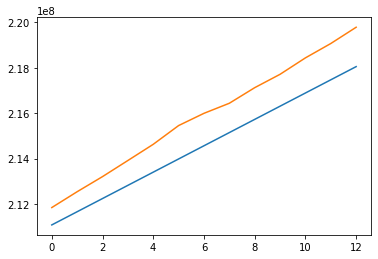

In [39]:
plt.plot(test_linear_pred)
plt.plot(y_test_confirmed)
print('MAE:', mean_absolute_error(y_test_confirmed, test_linear_pred))
print('MSE:',mean_squared_error(y_test_confirmed, test_linear_pred))

In [40]:
# r^2 score for LR

y_test_confirmed, svm_test_pred
r2_score(y_test_confirmed, test_linear_pred)

0.7059183647196348

In [41]:
# plt.figure(figsize=(20, 12))
# plt.plot(adjusted_dates, world_cases)
# plt.plot(future_forecast, linear_pred, linestyle='dashed', color='orange')
# plt.title('Number of Coronavirus Cases Over Time', size=30)
# plt.xlabel('Days Since 1/22/2020', size=30)
# plt.ylabel('Number of Cases', size=30)
# plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])
# plt.xticks(size=15)
# plt.yticks(size=15)
# plt.show()

In [42]:
# Predictions for the next 10 days using Linear Regression

print('Linear regression future predictions:')
print(linear_pred[-10:])

Linear regression future predictions:
[[2.18626692e+08]
 [2.19207181e+08]
 [2.19787670e+08]
 [2.20368159e+08]
 [2.20948648e+08]
 [2.21529137e+08]
 [2.22109626e+08]
 [2.22690115e+08]
 [2.23270604e+08]
 [2.23851093e+08]]


**Singapore Predictions**

In [59]:
# split data into train/test for Singapore

days_to_skip = 529
X_train_sg_confirmed, X_test_sg_confirmed, y_train_sg_confirmed, y_test_sg_confirmed = train_test_split(days_since_1_22[days_to_skip:], singapore_cases[days_to_skip:], test_size=0.20, shuffle=False)

In [60]:
svm_sg_confirmed = SVR(shrinking=True, kernel='poly', gamma=0.01, epsilon=1, degree=3, C=0.1)
svm_sg_confirmed.fit(X_train_sg_confirmed, y_train_sg_confirmed.ravel())
svm_sg_pred = svm_sg_confirmed.predict(future_forecast)

MAE: 425.96525033252186
MSE: 204283.71165621706


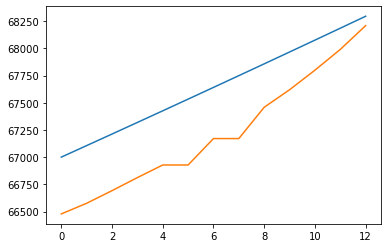

In [61]:
# check against testing data

svm_sg_test_pred = svm_sg_confirmed.predict(X_test_sg_confirmed)
plt.plot(svm_sg_test_pred)
plt.plot(y_test_sg_confirmed)
print('MAE:', mean_absolute_error(svm_sg_test_pred, y_test_sg_confirmed))
print('MSE:',mean_squared_error(svm_sg_test_pred, y_test_sg_confirmed))

In [62]:
# r^2 score for SVM

r2_score(y_test_sg_confirmed, svm_sg_test_pred)

0.28493192282396473

In [63]:
# Predictions for the next 10 days using SVM

print('SVM future predictions:')
set(zip(future_forecast_dates[-10:], svm_sg_pred[-10:]))

SVM future predictions:


{('09/04/2021', 68406.37394614035),
 ('09/05/2021', 68517.12885851675),
 ('09/06/2021', 68628.25856680685),
 ('09/07/2021', 68739.76372093969),
 ('09/08/2021', 68851.644951294),
 ('09/09/2021', 68963.90287823492),
 ('09/10/2021', 69076.53814167791),
 ('09/11/2021', 69189.55138582998),
 ('09/12/2021', 69302.94322438055),
 ('09/13/2021', 69416.71430153662)}